### EDA

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
print (f"shape of the train dataframe is {train_df.shape}")
print (f"shape of the test dataframe is {test_df.shape}")

shape of the train dataframe is (8693, 14)
shape of the test dataframe is (4277, 13)


In [ ]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
for col in train_df:
    print(f'Number of Unique values in column "{col}":', train_df[col].nunique())
    print(f'Type of the column "{col}":', train_df[col].dtypes)
    print ()


Number of Unique values in column "PassengerId": 8693
Type of the column "PassengerId": object

Number of Unique values in column "HomePlanet": 3
Type of the column "HomePlanet": object

Number of Unique values in column "CryoSleep": 2
Type of the column "CryoSleep": object

Number of Unique values in column "Cabin": 6560
Type of the column "Cabin": object

Number of Unique values in column "Destination": 3
Type of the column "Destination": object

Number of Unique values in column "Age": 80
Type of the column "Age": float64

Number of Unique values in column "VIP": 2
Type of the column "VIP": object

Number of Unique values in column "RoomService": 1273
Type of the column "RoomService": float64

Number of Unique values in column "FoodCourt": 1507
Type of the column "FoodCourt": float64

Number of Unique values in column "ShoppingMall": 1115
Type of the column "ShoppingMall": float64

Number of Unique values in column "Spa": 1327
Type of the column "Spa": float64

Number of Unique valu

In [ ]:
categorical_columns = ['HomePlanet','CryoSleep','Cabin','Destination','VIP']
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_column = 'Transported'
unwanted_columns = ['Name','PassengerId']

In [ ]:
train_df[numerical_columns].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train_df[categorical_columns].describe()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
count,8492,8476,8494,8511,8490
unique,3,2,6560,3,2
top,Earth,False,G/734/S,TRAPPIST-1e,False
freq,4602,5439,8,5915,8291


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function for numerical columns
import math

# Function for numerical columns
def plot_numerical(df, num_cols):
    num_plots = len(num_cols) * 2
    num_rows = len(num_cols)

    fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows*4))
    axs = axs.ravel()

    for i, col in enumerate(num_cols):
        # histogram with KDE
        sns.histplot(df[col], kde=True, bins=20, ax=axs[2*i])
        axs[2*i].set_title(f'Histogram with KDE for {col}')

        # boxplot
        sns.boxplot(x=target_column, y='Age', data=train_df,ax=axs[2*i+1])
        axs[2*i+1].set_title(f'Boxplot for {col} by taget col: {target_column}')

    plt.tight_layout()
    plt.show()


# Function for categorical columns
def plot_categorical(df, cat_cols):
    num_plots = len(cat_cols) * 2
    num_rows = len(cat_cols)

    fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows*4))
    axs = axs.ravel()

    for i, col in enumerate(cat_cols):

        # pie chart
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[2*i])
        axs[2*i].set_title(f'Pie char for {col}')


        # countplot
        sns.countplot(data=df, x=col, hue=target_column,ax=axs[2*i+1])
        axs[2*i+1].set_title(f'Countplot for {col}  by taget col: {target_column} ')


    plt.tight_layout()
    plt.show()


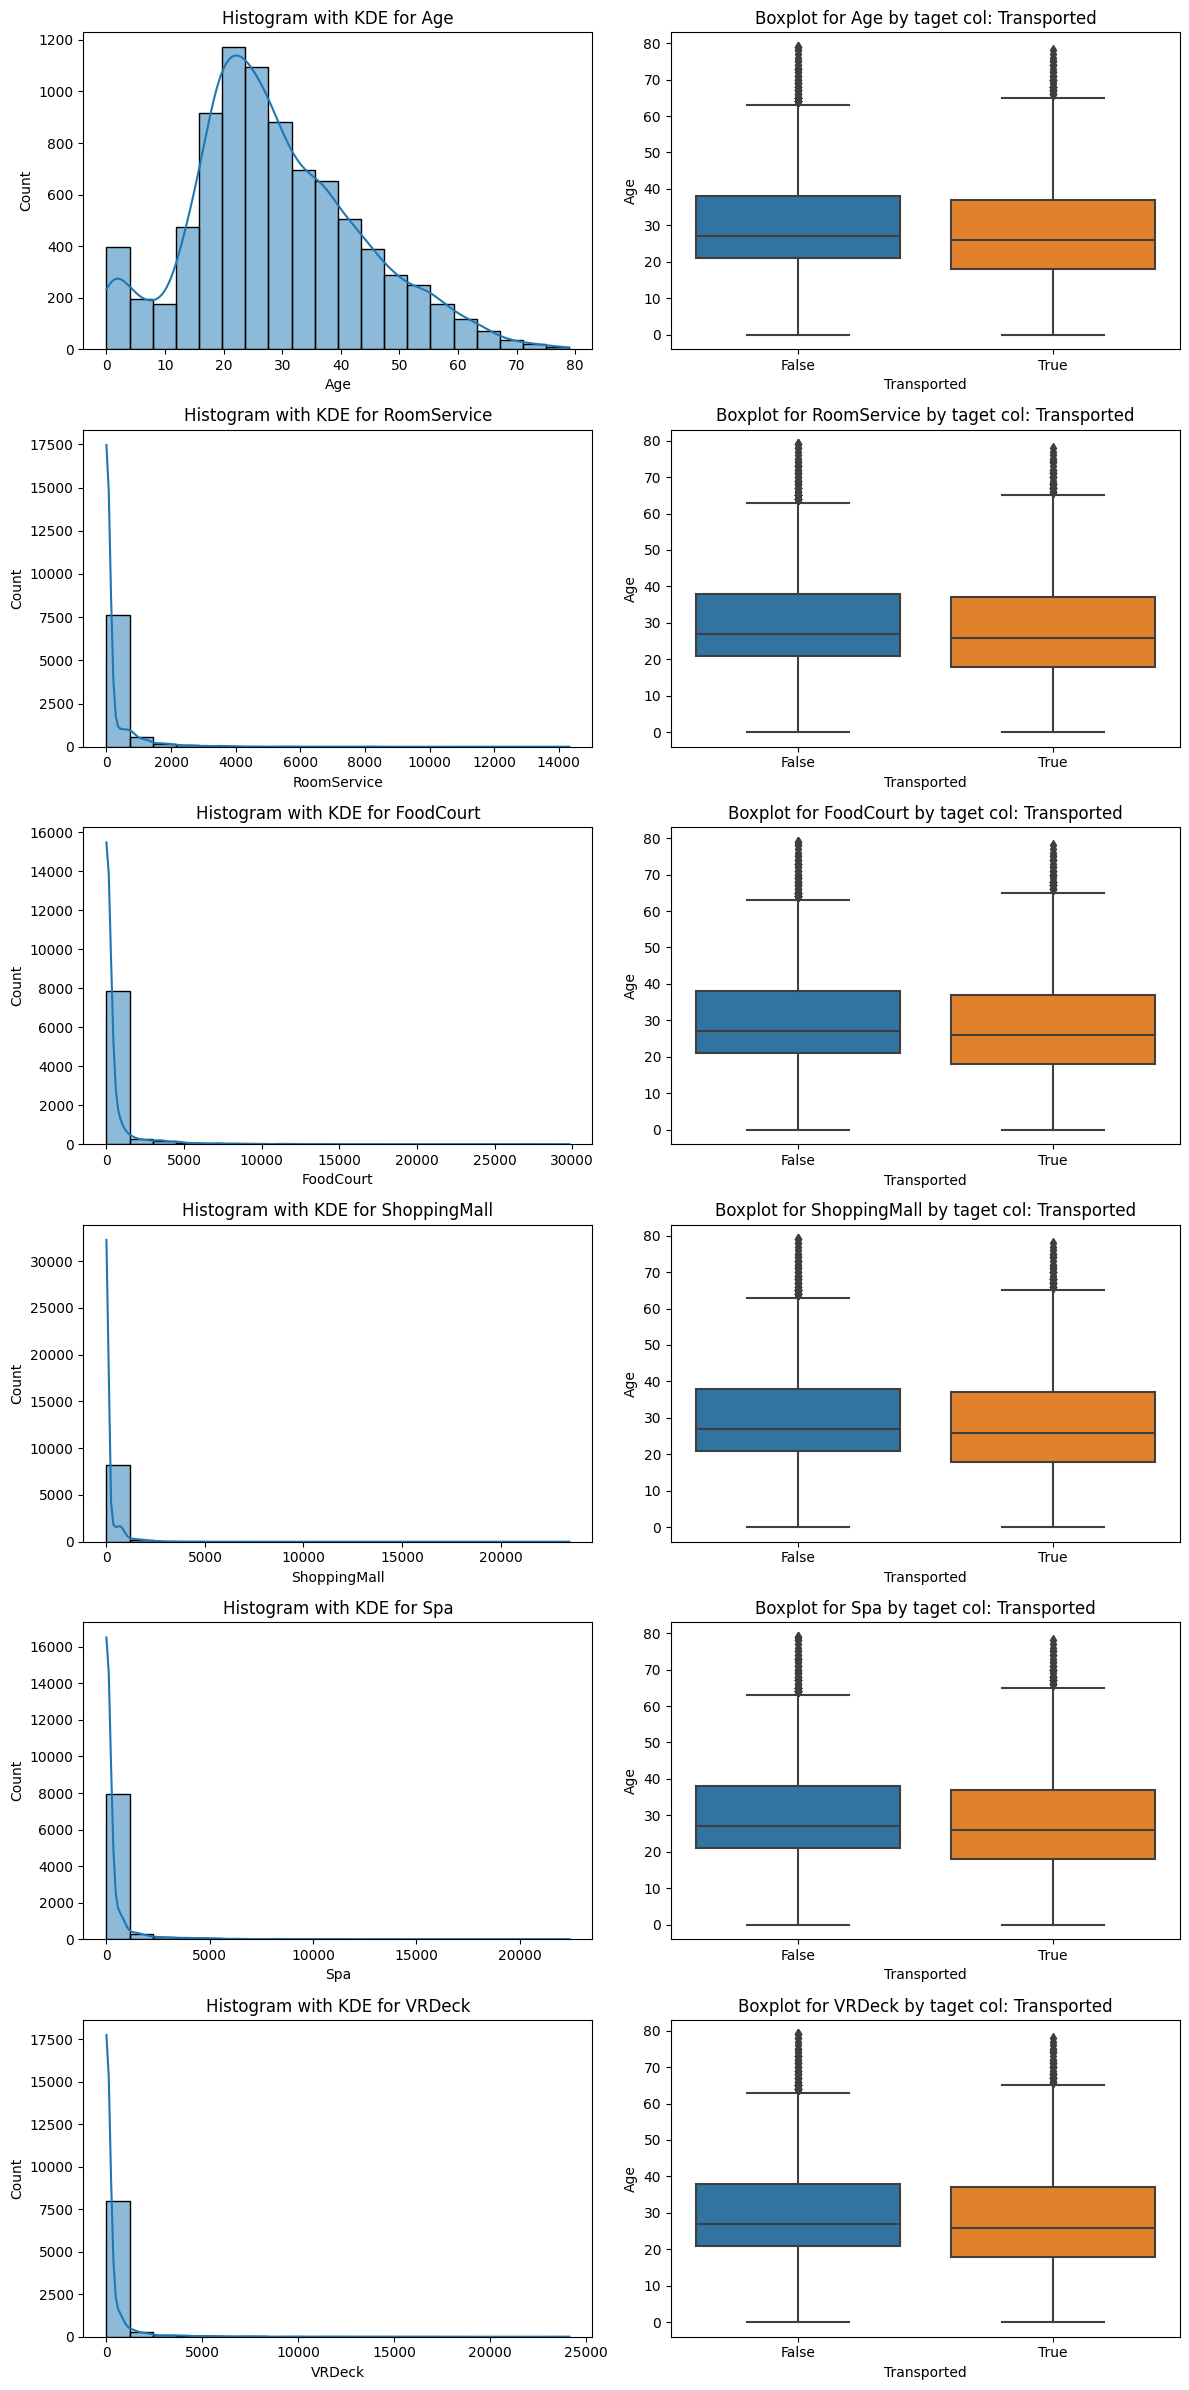

In [ ]:
plot_numerical(train_df,['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])#

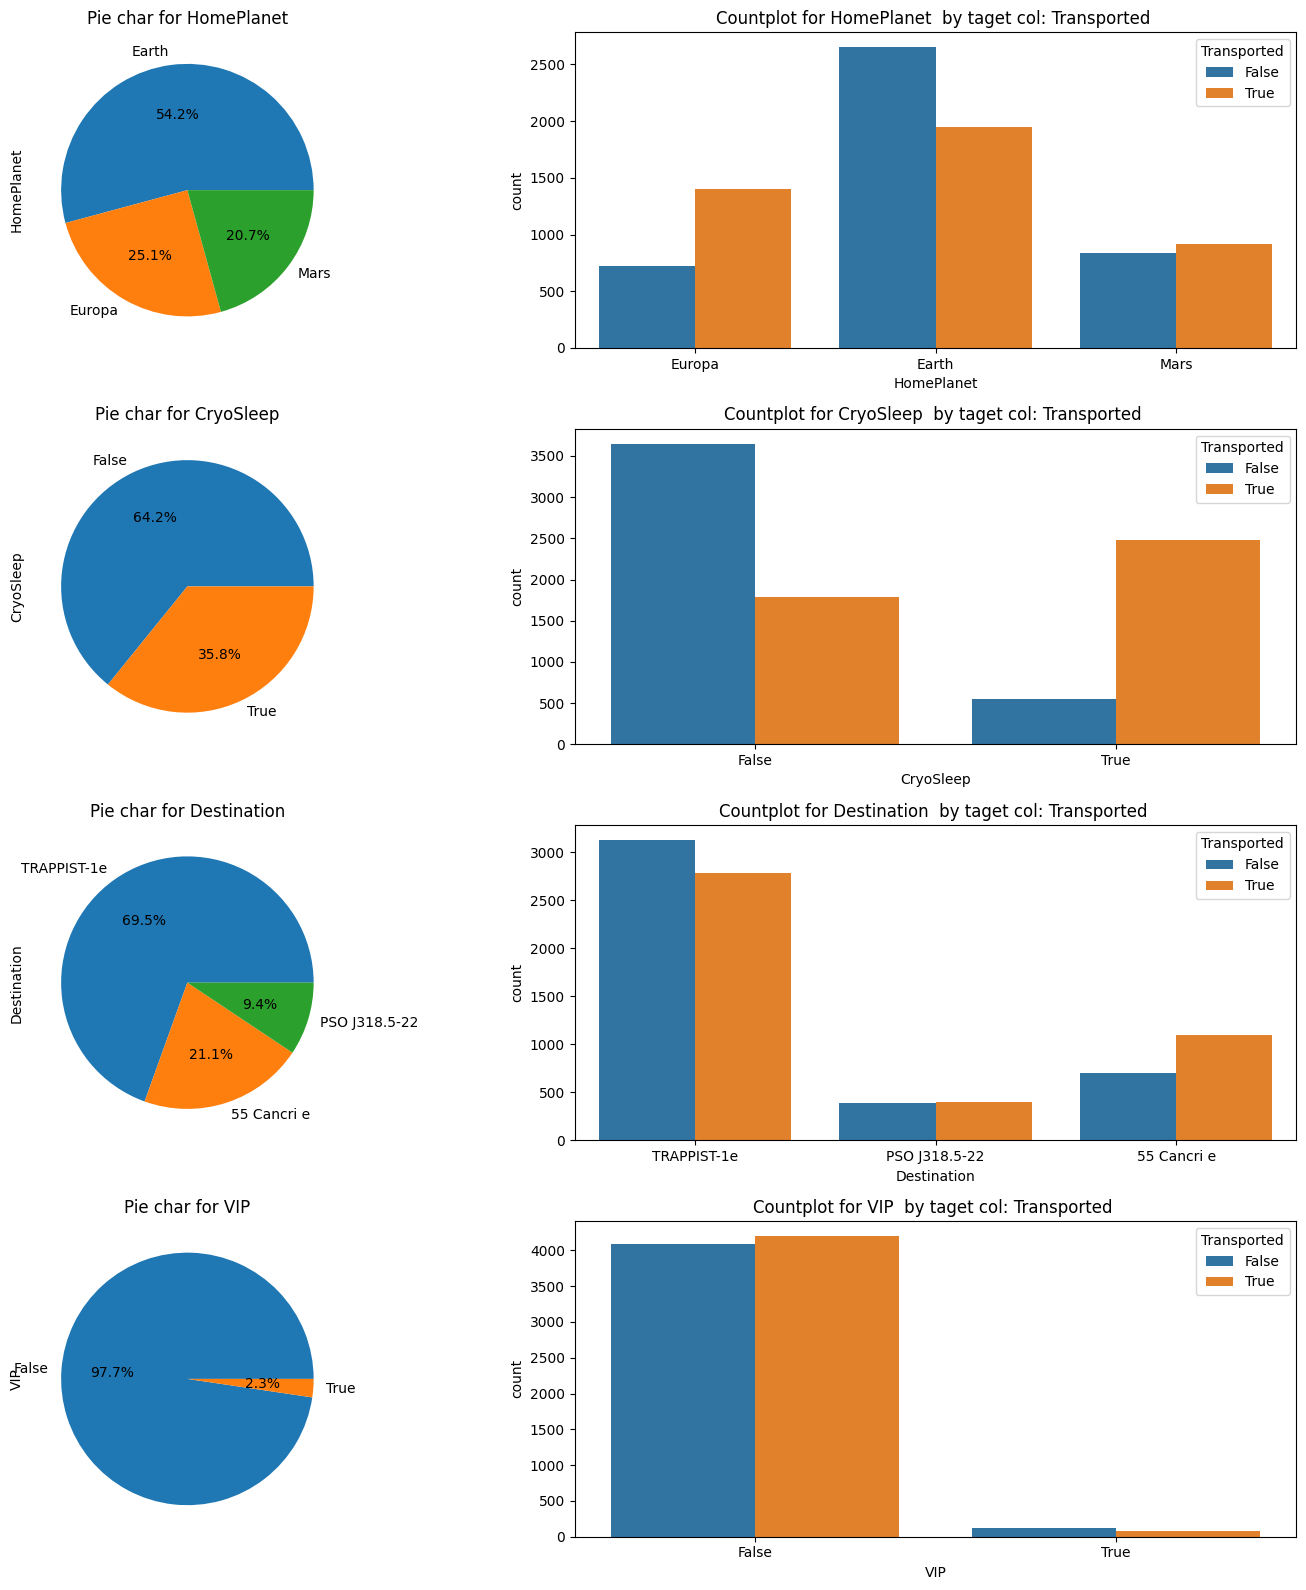

In [ ]:
plot_categorical(train_df,['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency
#Functions to Perform TTest, Man Whitney U Test, Chi Squared Test

def perform_ttest(df, numerical, categorical):
    group1 = df[df[categorical] == df[categorical].unique()[0]][numerical]
    group2 = df[df[categorical] == df[categorical].unique()[1]][numerical]

    _, p_val = ttest_ind(group1, group2, nan_policy='omit')

    return 'Significant' if p_val < 0.05 else 'Insignificant'

def perform_mannwhitneyu(df, numerical, categorical):
    group1 = df[df[categorical] == df[categorical].unique()[0]][numerical]
    group2 = df[df[categorical] == df[categorical].unique()[1]][numerical]

    _, p_val = mannwhitneyu(group1.dropna(), group2.dropna())

    return 'Significant' if p_val < 0.05 else 'Insignificant'

def perform_chi2(df, cat1, cat2):
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    _, p_val, _, _ = chi2_contingency(contingency_table)

    return 'Significant' if p_val < 0.05 else 'Insignificant'

def perform_statistical_tests(df, test_dict):
    results = []

    for column_name, test_info in test_dict.items():
        test_function = test_info['test']
        args = test_info['args']

        # Call the test function
        result = test_function(df, *args)

        # Append results
        results.append({'column_name': column_name,
                        'test_performed': test_function.__name__,
                        'Result': result})

    # Convert results to DataFrame
    return pd.DataFrame(results)

# Example Usage
test_dict = {
    'HomePlanet': {'test': perform_chi2, 'args': ['HomePlanet', 'Transported']},
    'CryoSleep': {'test': perform_chi2, 'args': ['CryoSleep', 'Transported']},
    'VIP': {'test': perform_chi2, 'args': ['VIP', 'Transported']},
    'Destination': {'test': perform_chi2, 'args': ['Destination', 'Transported']},

    'Age': {'test': perform_ttest, 'args': ['Age','Transported']},
    'RoomService': {'test': perform_mannwhitneyu, 'args': ['RoomService','Transported']},
    'FoodCourt': {'test': perform_mannwhitneyu, 'args': ['FoodCourt','Transported']},
    'ShoppingMall': {'test': perform_mannwhitneyu, 'args': ['ShoppingMall','Transported']},
    'Spa': {'test': perform_mannwhitneyu, 'args': ['Spa','Transported']},
    'VRDeck': {'test': perform_mannwhitneyu, 'args': ['VRDeck','Transported']}
}
result_df = perform_statistical_tests(train_df, test_dict)
result_df

,column_name,test_performed,Result
0,HomePlanet,perform_chi2,Significant
1,CryoSleep,perform_chi2,Significant
2,VIP,perform_chi2,Significant
3,Destination,perform_chi2,Significant
4,Age,perform_ttest,Significant
5,RoomService,perform_mannwhitneyu,Significant
6,FoodCourt,perform_mannwhitneyu,Significant
7,ShoppingMall,perform_mannwhitneyu,Significant
8,Spa,perform_mannwhitneyu,Significant
9,VRDeck,perform_mannwhitneyu,Significant


<Axes: >

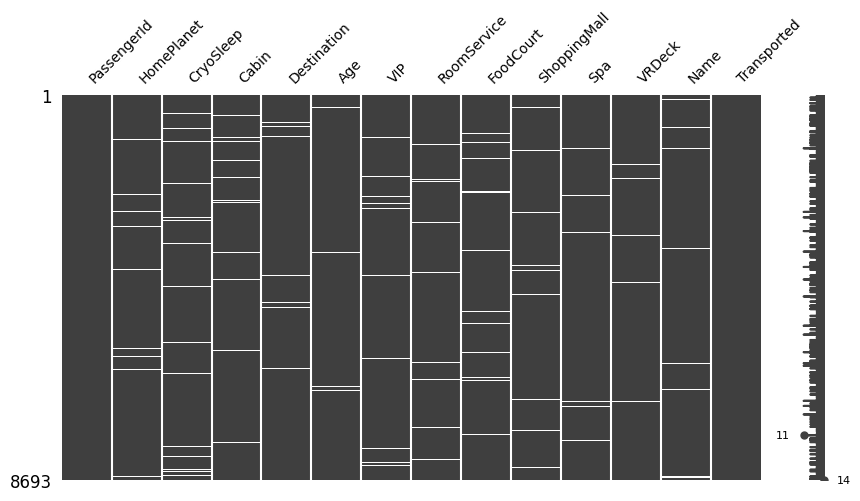

In [ ]:
import missingno as msno
msno.matrix(train_df,figsize=(10,5),fontsize=10)